<a href="https://colab.research.google.com/github/mikeonly/nma_easy_cabbage/blob/master/pcaplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Michael's part

In [ ]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.ticker import MaxNLocator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
seaborn.set()

# Plotting

In [ ]:
def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.

  Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(variance_explained, '--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  
  # Force ticks to be at integer values
  ax = plt.gca()
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  
  plt.show()


def visualize_components(component1, component2, labels_index, labels, show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats)    : Vector of component 1 scores
    component2 (numpy array of floats)    : Vector of component 2 scores
    labels_index (numpy array of floats)  : Vector corresponding to categories 
                                            indicies of samples
    labels (numpy array of strings)       : Vector corresponding to categories 
                                            names of samples

  Returns:
    Nothing.
    
  """

  plt.figure()
  n_labels = len(labels)  # number of labels for the data
  # Good options for color maps are:
  # cmap_name = 'plasma'
  cmap_name = 'cubehelix'
  cmap = cmap=plt.cm.get_cmap(cmap_name, n_labels)
  plt.scatter(x=component1, y=component2, c=labels_index, cmap=cmap)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  cbar = plt.colorbar(ticks=range(n_labels))
  cbar.set_ticklabels(labels)
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

In [ ]:
def get_variance_explained(evals):
  """
  Calculates variance explained from the eigenvalues.

  Args:
    evals (numpy array of floats) : Vector of eigenvalues

  Returns:
    (numpy array of floats)       : Vector of variance explained

  """

  # cumulatively sum the eigenvalues
  csum = np.cumsum(evals)
  # normalize by the sum of eigenvalues
  variance_explained = csum / csum[-1]

  return variance_explained

# Testing
Test that functions above work with a test PCA analysis results from `scikit`. For that we load an example dataset and run the functions.

In [ ]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml(name='mnist_784')
# X = mnist.data
# labels = [int(k) for k in mnist.target]
# labels = np.array(labels)

In [ ]:
# from sklearn.decomposition import PCA
# pca_model = PCA(n_components=400) # Initializes PCA
# pca_model.fit(X) # Performs PCA 

PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

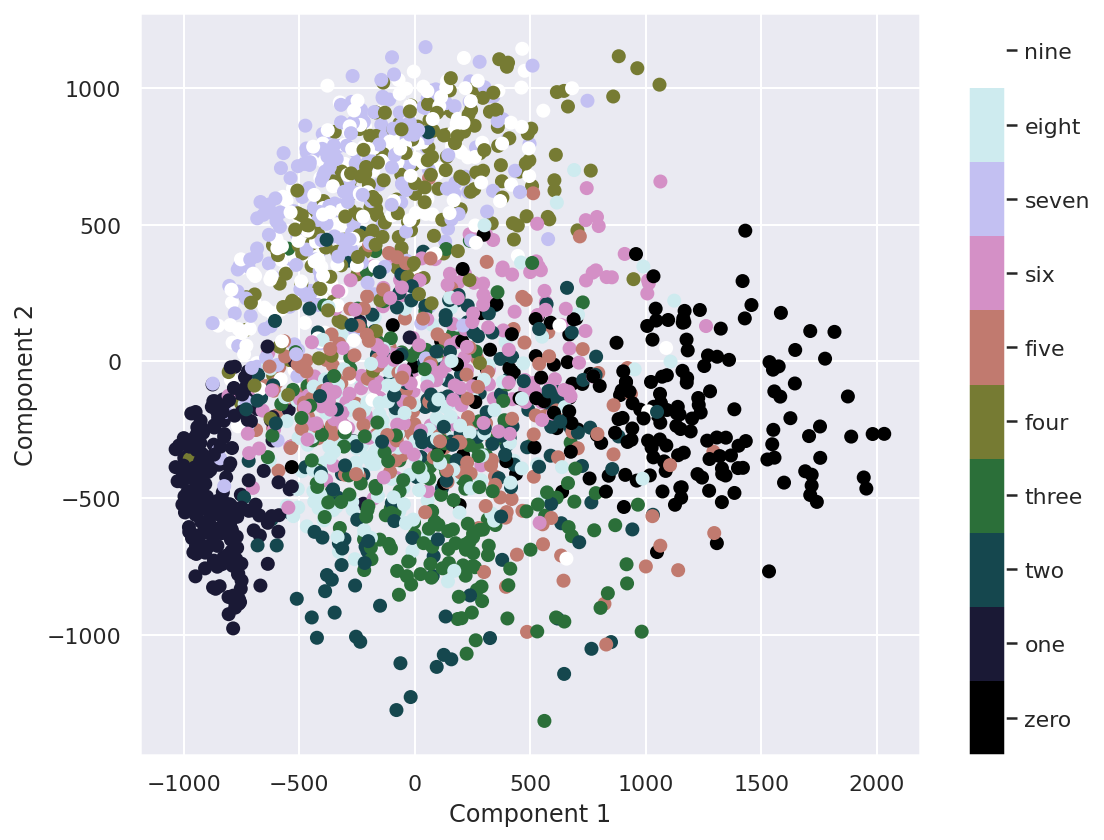

In [ ]:
# Perform PCA
# scores = pca_model.transform(X)

# component1 = scores[:2000, 0]
# component2 = scores[:2000, 1]
# labels_index = labels[:2000]
# labels = labels[:2000]

# Plot the PCAs
# visualize_components(component1, component2, labels_index, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])

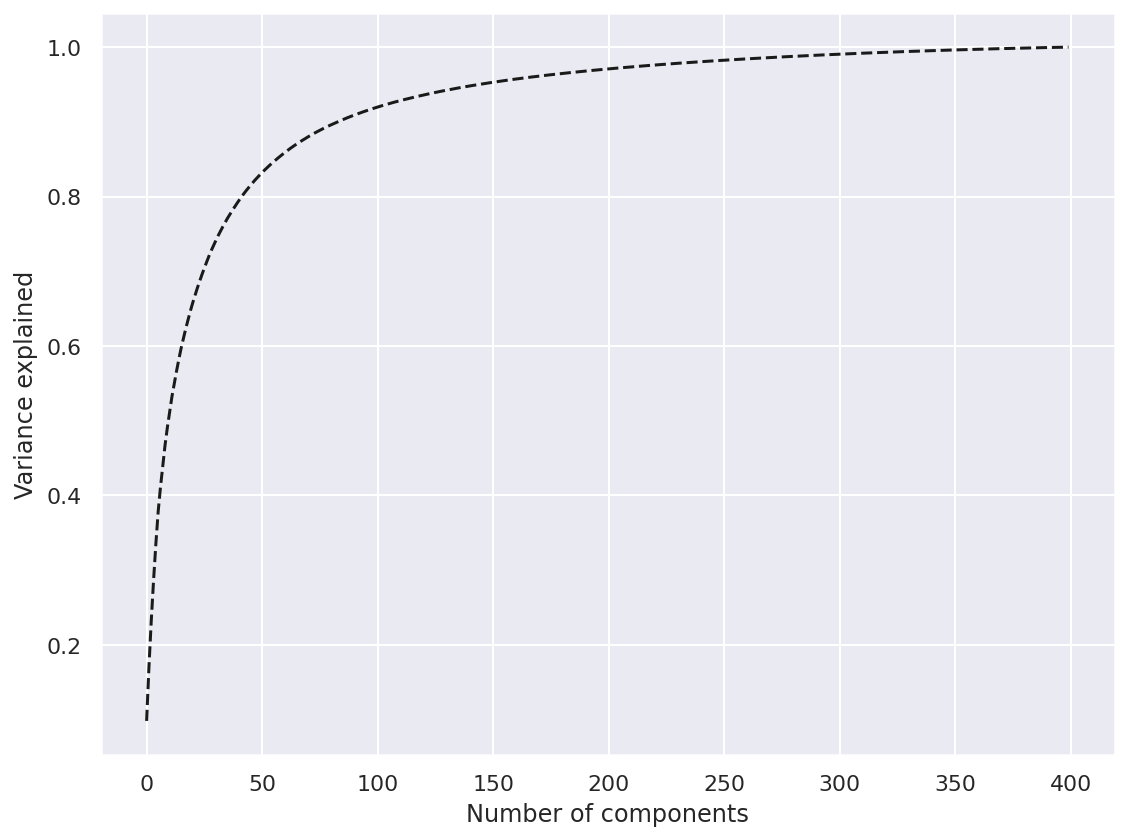

In [ ]:
# plot_variance_explained(get_variance_explained(pca_model.explained_variance_))